In [9]:
import numpy as np
import scipy.special as sp_special
import matplotlib.pyplot as plt
import matplotlib as mpl
#in this notebook I test the ability for a planetary wind to form a disc around the star and possible observational signatures

In [ ]:
#if the gas is around for a long time we assume that it is photoionization-recombination equilibrium
#we have the requirement that the gas must be optically thin to EUV photons, otherwise the planetary wind would not be able to be launched in the first.
#(side note, if it is possible for the wind to get launched by X-rays or high energy EUV photons, then requirement does not hold)

In [10]:
#we can calculate the number of neutral hydrogen as a function of number density of hydrogen

alphaA_LyA = 4.18e-13

def nHI(nH, gamma):
    nHI = nH * (1 + (gamma - np.sqrt(gamma**2 + 4 * alphaA_LyA * nH * gamma)) / (2 * alphaA_LyA * nH))
    return nHI

def ne(nH, gamma):
    return nH - nHI(nH, gamma)

In [11]:
#calculate the number of helium atoms
alpha1 = 2.16e-13               #use case A
alpha3 = 2.25e-13               #check recombination values
q13a = 4.5e-20 #cm^3s^-1
q31a = 2.6e-8  #cm^3s^-1
q31b = 4.0e-9  #cm^3s^-1
Q31 = 5e-10    #cm^3s^-1
A31 = 1.272e-4 #s^-1
m_p = 1.67e-24 #g

In [12]:
def He_fractions(nH, gamma, phi1, phi3):
    
    n_e = ne(nH, gamma)
    n_HI = nHI(nH, gamma)
    
    f1 = (n_e * (alpha3 * (A31 + n_HI * Q31 + n_e * (q31a + q31b)) + alpha1 * (A31 + phi3 + n_HI * Q31 + n_e * (q31a + q31b))))\
    / (A31 * phi1 + phi1 * phi3 + n_e * phi3 * q13a + n_HI * phi1 * Q31 + n_e * phi1 * q31a + n_e * phi1 * q31b + alpha3 * n_e * (A31 + phi1 + n_HI * Q31\
    + n_e * (q13a + q31a + q31b)) + alpha1 * n_e * (A31 + phi3 + n_HI * Q31 + n_e * (q13a + q31a + q31b)))
    
    f3 = (n_e * (alpha3 * phi1 + (alpha1 + alpha3) * n_e * q13a)) / (A31 * phi1 + phi1 * phi3 + n_e * phi3 * q13a + n_HI * Q31 * phi1\
    + n_e * phi1 * q31a + n_e * phi1 * q31b + alpha3 * n_e * (A31 + phi1 + n_HI * Q31 + n_e * (q13a + q31a + q31b)) +\
    alpha1 * n_e * (A31 + phi3 + n_HI * Q31 + n_e * (q13a + q31a + q31b)))
    
    return f1,f3

def nHe_triplet(nH, gamma, nHe, phi1, phi3):
    
    f3 = He_fractions(nH, gamma, phi1, phi3)[1]
    nHe_triplet = nHe * f3
    
    return nHe_triplet
    
    

In [13]:
xs_photo = 6.3e-18
xs_He_lc = 8e-13

In [14]:
def tau_He_triplet(nH, gamma, nHe, phi1, phi3, l):
    
    return nHe_triplet(nH, gamma, nHe, phi1, phi3) * xs_He_lc * l

In [15]:
def tau_ratio(nH, gamma, nHe, phi1, phi3):
    
    return nHI(nH, gamma) / nHe_triplet(nH, gamma, nHe, phi1, phi3) *  xs_photo / xs_He_lc

In [16]:
def simple_tau_ratio(nH, gamma, nHe, phi1, phi3):
    
    return (nH / nHe) * (phi3 + q31a * nH) * (alphaA_LyA / (alpha3 * gamma)) * (xs_photo / xs_He_lc)

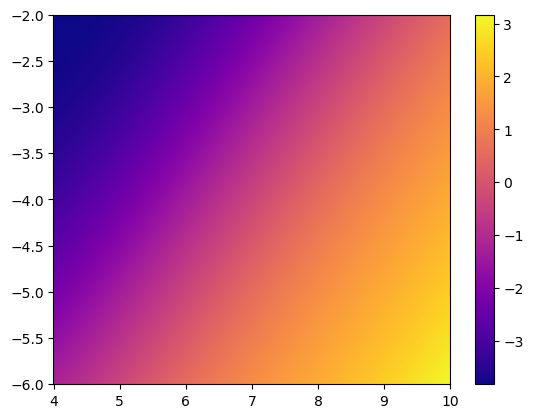

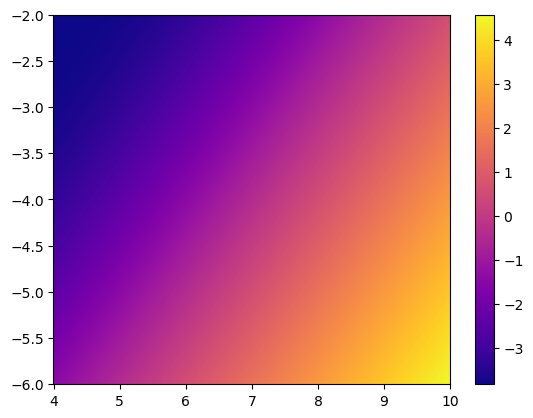

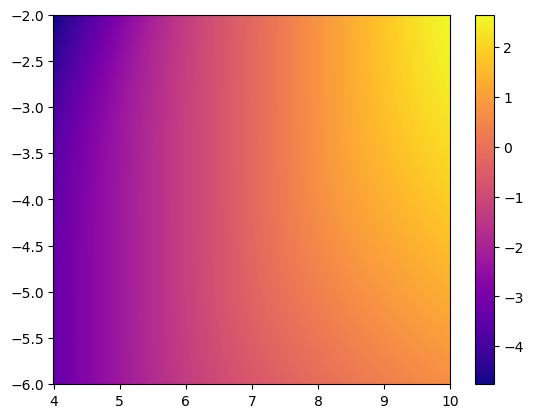

In [17]:
#make a plot of the tau ratio for constant nH/nHe and constant gamma/phi1 and gamma/phi2

nH = np.logspace(4, 10, 1000)
nHe = 0.1 * nH
gamma = np.logspace(-6, -2, 1000)
phi1 = gamma
phi3 = gamma

nHnH, gammagamma = np.meshgrid(nH, gamma, indexing = 'ij')

nHenHe = 0.1 * nHnH
phi1phi1 = gammagamma
phi3phi3 = gammagamma

#tau ratio
fig1, ax1 = plt.subplots()
pcm1 = ax1.pcolormesh(np.log10(nHnH), np.log10(gammagamma), np.log10(tau_ratio(nHnH, gammagamma, nHenHe, phi1phi1, phi3phi3)), cmap = mpl.colormaps['plasma'])
fig1.colorbar(pcm1)

#simple tau ratio
fig2, ax2 = plt.subplots()
pcm2 = ax2.pcolormesh(np.log10(nHnH), np.log10(gammagamma), np.log10(simple_tau_ratio(nHnH, gammagamma, nHenHe, phi1phi1, phi3phi3)), cmap = mpl.colormaps['plasma'])
fig2.colorbar(pcm2)

#opt depth helium
fig3, ax3 = plt.subplots()
pcm3 = ax3.pcolormesh(np.log10(nHnH), np.log10(gammagamma), np.log10(tau_He_triplet(nHnH, gammagamma, nHenHe, phi1phi1, phi3phi3, 10**11)), cmap = mpl.colormaps['plasma'])
fig3.colorbar(pcm3)

In [ ]:
#look at this in the case of 

In [111]:
tau_ratio(10**-17 / m_p, 10**-4, 0.1 * 10**-17 / m_p, 10**-4, 10**-4)

0.2573202955044181

In [103]:
def tau_He_triplet(nH, gamma, nHe, phi1, phi3, l):
    
    return nHe_triplet(nH, gamma, nHe, phi1, phi3) * xs_He_lc * l

In [110]:
tau_He_triplet(10**-17 / m_p, 10**-4, 0.1 * 10**-17 / m_p, 10**-4, 10**-4, 10**10)

0.1748287117053705

In [21]:
c = 2.9979e10
m_e = 9.11e-28
m_p = 1.67e-24
e = 4.803e-10
k_b = 1.3807e-16
He_wavj0 = 1.082909e-4
He_wavj1 = 1.083025e-4
He_wavj2 = 1.083033e-4 #cm

def doppler_shift(w0, velocity):
    return (1 + velocity / c)*w0

def voigt_profile(w, w0, gauss_sigma, lorentz_HWHM):
    """Return

    Parameters
    --------------------
    w:

    w0:

    gauss_sigma: standard variation of

    lorentz_HWHM:

    """

    return sp_special.voigt_profile(w-w0, gauss_sigma, lorentz_HWHM)

def voigt_xsection(w, w0, f, Gamma, T, mmw):
    """
    Compute the absoprtion cross section using the voigt profile for a line

    Parameters
    ------------------------
    w:

    w0: Line center wavelength (may be doppler shifted)

    f:

    Gamma:

    T:

    mass:

    Returns
    --------------------------
    """

    lorentz_HWHM = Gamma / (4*np.pi)
    #fixed from last commit
    gauss_sigma = np.sqrt(k_b*T/(mmw * c**2))*w0
    xsection = np.pi * e**2 / (m_e * c) * f * voigt_profile(w, w0, gauss_sigma, lorentz_HWHM)
    return xsection

def He_triplet_xsection(w, absorber_v, T, j):
    if j == 0:
        absorber_w0 = doppler_shift(c / He_wavj0, absorber_v) #in the frame of the object emitting light
        f = 5.9902e-02
        Gamma = 1.0216e+07
    elif j == 1:
        absorber_w0 = doppler_shift(c / He_wavj1, absorber_v)
        f = 1.7974e-01
        Gamma = 1.0216e+07
    elif j == 2:
        absorber_w0 = doppler_shift(c / He_wavj2, absorber_v)
        f = 2.9958e-01
        Gamma = 1.0216e+07

    xsection = voigt_xsection(w, absorber_w0, f, Gamma, T, 4*m_p)
    return xsection

In [28]:
He_triplet_xsection(c / He_wavj2, 0 , 10**4, 2)

7.55397533525745e-13

In [112]:
(10**-4 + alpha1 * 10**7) / (alpha1 * 10**7)

47.2962962962963

In [11]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.6261e-27
c = 2.9979e10
k = 1.3807e-16
erg = 6.242e11

def bb(nu, T):

    return (2 * h * nu**3 / c**2) * 1 / (np.exp(h * nu / (k * T)) - 1)

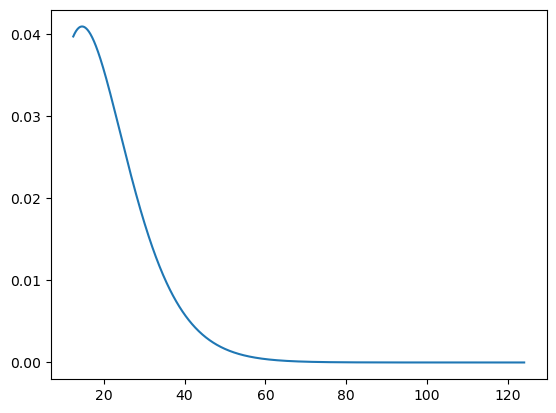

In [18]:
nu = np.linspace(3e15, 3e16, 1000)
eV = nu * h * erg

plt.plot(eV, bb(nu, 60000))

In [9]:
0.29 / (80000)

3.6249999999999996e-06